In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [50]:
data1=[[1,1.4,2,3],[3,5,8,9],[1,1.4,2,3]]
data_music=[[1, 3, 5, 9], [1, 3, 5, 9], [1, 4, 5, 7, 9, 11], 
            [1, 3, 4, 5, 7, 9, 11], [1, 3, 5, 9], [1, 3, 5, 9], [1, 4, 5, 7, 9, 11], 
            [1, 3, 5], [1, 3, 5, 7, 9, 11], [1, 3, 5, 7, 9, 11], [1, 4, 5, 7, 9, 11], 
            [1, 5, 6, 7, 8, 9, 11], [1, 3, 5, 7, 9, 11], [1, 3, 5, 7, 9, 11], [1, 4, 5, 7, 9, 11], [1, 5]]
data_random=[[2, 3, 5, 6, 8, 10], [3, 6, 7, 10], [2, 3, 5, 6, 8, 9], [2, 3, 5, 6], [4, 5, 6, 10],
            [3, 4, 5, 6, 7, 8, 9, 11], [2, 6, 9, 11], [2, 4, 7]]

In [5]:
def distance_bar(bar1,bar2):
    #In the 12-position format of each bar, if the same positions in two bars all have a beat than their distance
    #is zero, otherwise the distance will add 1
    ##Return the distance between bar1 and bar2
    dis_bar=0;
    for i in range(12):
        if(bar1[i]==bar[i]):
            continue
        else:
            dis_bar=dis_bar+1
    return dis_bar
                
        

In [44]:
def correlation_measure(mea1):
    # The correlation between each bar in one piece, the input should be in the 12-position form
    mea1=pd.DataFrame(mea1)
    corr_matrix=mea1.T.corr()
    plt.figure(figsize=(10,8))
    mask = np.zeros_like(corr_matrix, dtype=np.bool_)
    mask[np.triu_indices_from(mask)] = True
    mask[np.diag_indices_from(mask)]=False
    plt.title("")
    sns.heatmap(corr_matrix, annot = True,mask = mask, linewidths=.5, cmap="YlGnBu") 
    plt.show()
    #plt.tight_layout()


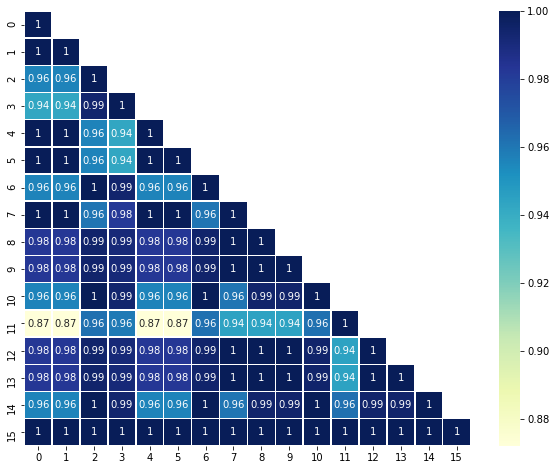

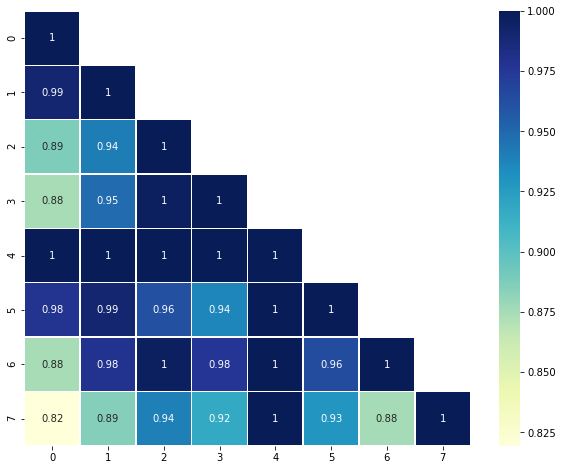

In [45]:
correlation_measure(data_music)
correlation_measure(data_random)

In [47]:
def averagebeat_per_piece(piece):
    # calculate average beats in one piece in each bar
    num_bar=len(piece)
    num_beat=0
    for i in range(len(piece)):
        num_beat=num_beat+len(piece[i][:])
    return num_beat/num_bar

In [51]:
print(averagebeat_per_piece(data_random))

5.25


In [ ]:
def weighted(piece):
    weights=0
    for i in range(len(piece)):
        if(1 in piece[i]):
            weights=weights+2
        elif(5 in piece[i]):
            weights=weight+1
        elif(9 in piece[i]):
            weights=weight+1
    return weights